In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook 
snmpdata_names = sorted(glob.glob('data-Stanford-09-29-18/*.snmp'))

In [ ]:
#2.2.1.1.2.1.1.2.

In [2]:
def get_sec(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + float(s)

In [3]:
def overlap(a, b):
    # return the indices in a that overlap with b, also returns 
    # the corresponding index in b only works if both a and b are unique! 
    # This is not very efficient but it works
    bool_a = np.in1d(a,b)
    ind_a = np.arange(len(a))
    ind_a = ind_a[bool_a]

    ind_b = np.array([np.argwhere(b == a[x]) for x in ind_a]).flatten()
    return ind_a

In [4]:
def group_consecutives(vals,step = 1):
    run = []
    result = [run]
    expect = None
    for v in vals:
        if(v==expect) or (expect is None):
            run.append(v)
        else:
            run = [v]
            result.append(run)
        expect = v+step
    return result

In [5]:
Guest_time = {}
time_list = []
client_numberlist = []
for y in snmpdata_names[:]:
    connect_time = []
    TransFile = open(y)
    TransList = TransFile.readlines()
    half = int(len(TransList)/2)
    timest = y.split('-')
    times = timest[8]+':'+timest[9]+":"+timest[-1].split('.')[0]
    time_list.append(times)
    connect_time = [x.split(': ')[-1].split(' \n')[0] for x in TransList[:half] if "2.2.1.1.2.1.1.2." in x]
    clientnumber = [u.split(' ')[-1].split('\n')[0] for u in TransList[:half] if "2.2.1.4.1.1.0" in u]
    client_numberlist.append(int(clientnumber[0]))
    for x in connect_time:
        Guest_time.setdefault(x, []).append(times)

In [6]:
stay_interval = []
for x in Guest_time:
    ki = group_consecutives(overlap(time_list,Guest_time[x]))
#     print(len(ki))
    stay_interval.append(ki)

In [7]:
length_1 = []
length_2_5 = []
length_5_10 = []
length_10_20 = []
length_over_20 = []
for x in range(len(stay_interval)):
    if len(stay_interval[x])==1:
        length_1.append(stay_interval[x])
    elif len(stay_interval[x])>=2 and  len(stay_interval[x])<5:
        length_2_5.append(stay_interval[x])
    elif len(stay_interval[x])>=5 and  len(stay_interval[x])<10:
        length_5_10.append(stay_interval[x])
    elif len(stay_interval[x])>=10 and  len(stay_interval[x])<20:
        length_10_20.append(stay_interval[x])
    else:
        length_over_20.append(stay_interval[x])
#         print([len(y) for y in stay_interval[x]])


<IPython.core.display.Javascript object>


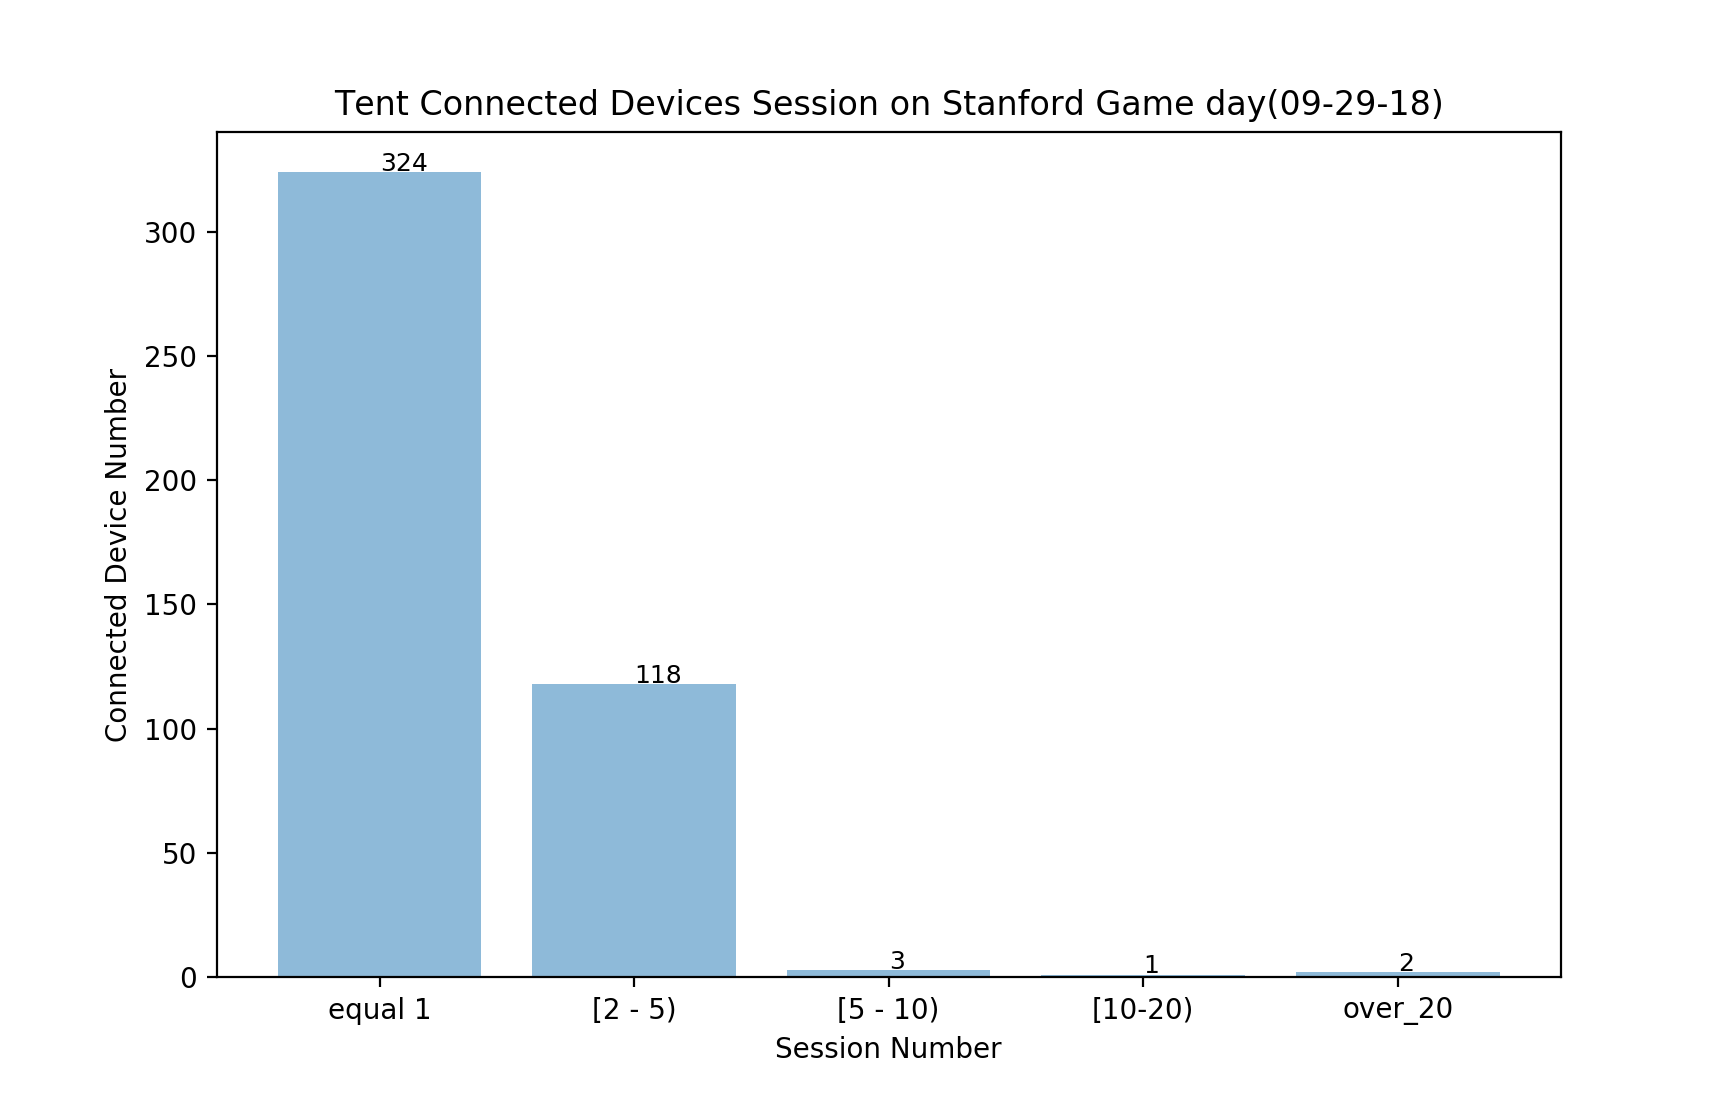

In [46]:
%matplotlib notebook 
objects = ('equal 1', '[2 - 5)', '[5 - 10)', '[10-20)', 'over_20')
y_pos = np.arange(len(objects))
performance = [len(length_1),len(length_2_5),len(length_5_10),len(length_10_20),len(length_over_20)]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Connected Device Number')
plt.xlabel('Session Number')
plt.title('Tent Connected Devices Session on Stanford Game day(09-29-18)')
for i in range(len(performance)):
    plt.text(x = y_pos[i] , y = performance[i]+0.5, s = performance[i], size = 9)
# for i, v in enumerate(performance):
#     plt.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.show()

In [67]:
session_length = []
session_interval = []
for x in range(len(length_2_5)):
    ([session_length.append(len(y)) for y in length_2_5[x]])
    for u in range(1,len(length_2_5[x])):
        a = get_sec(time_list[length_2_5[x][u][0]]) - get_sec(time_list[length_2_5[x][u-1][-1]])
        b = float("{0:.2f}".format(a/60))
        session_interval.append(b)

In [68]:
np.mean(session_interval)

50.07429530201342

In [10]:
mean_2_5 = float("{0:.2f}".format(np.mean(session_length)))
max_2_5 = np.max(session_length)
min_2_5 = np.min(session_length)
a = sorted(session_length)
b = int(len(session_length)/2)
median_2_5 = a[b]

In [13]:
ylabel1 = []
for x in range(len(time_list)):
    if x in length_2_5[14][0]:
        ylabel1.append(1)
    elif x in length_2_5[14][1]:
        ylabel1.append(1)
    else:
        ylabel1.append(0)

In [58]:
def get_session(length_over_20):
    ylabel_20 = np.zeros((len(time_list),), dtype=int)
    for x in range(len(time_list)):
        for y in length_over_20:
            if x in y:
                ylabel_20[y] = 1
    return ylabel_20

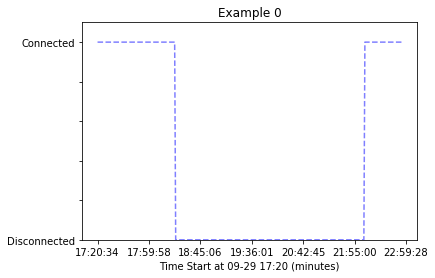

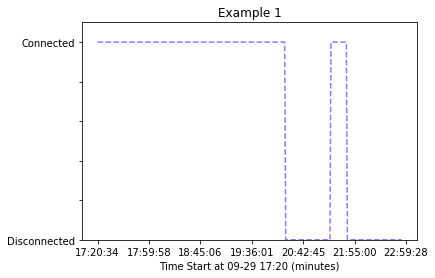

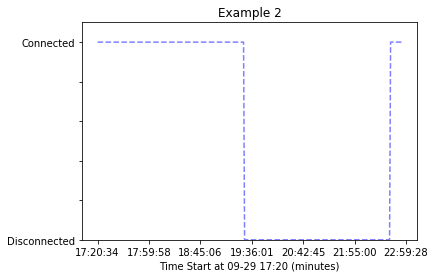

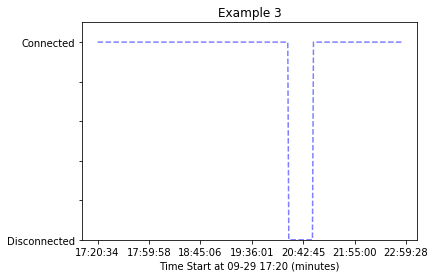

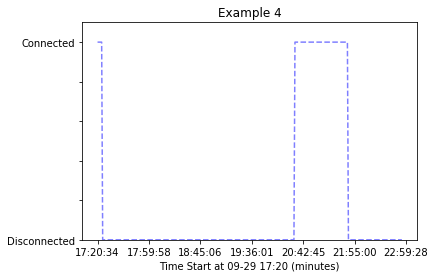

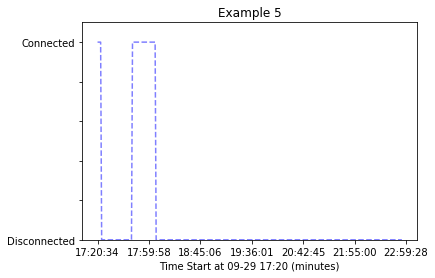

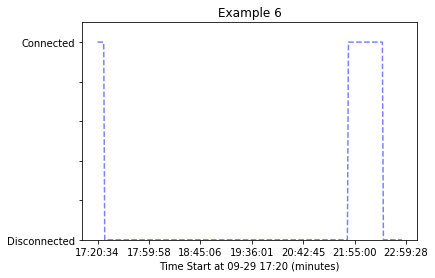

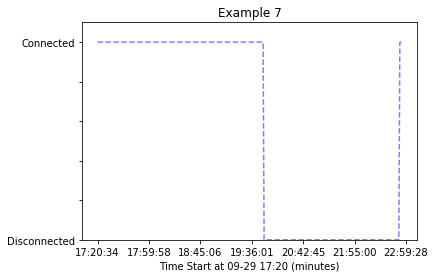

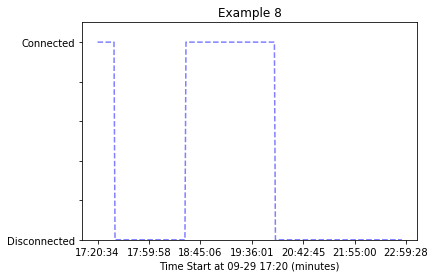

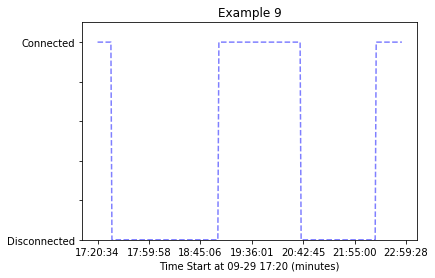

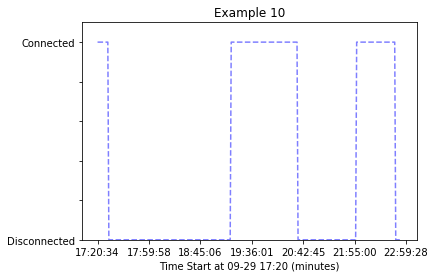

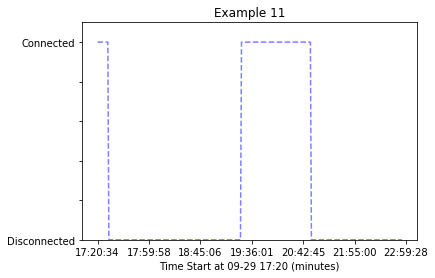

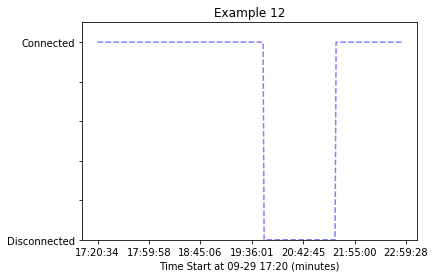

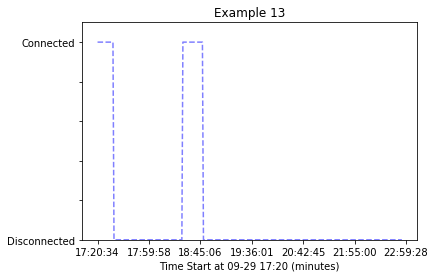

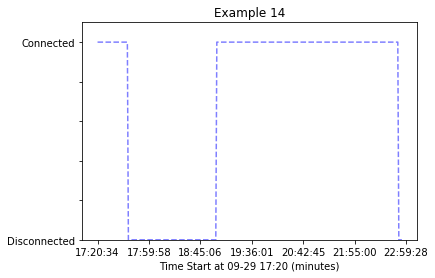

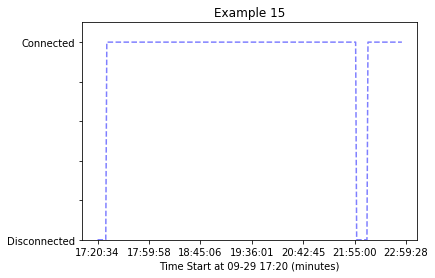

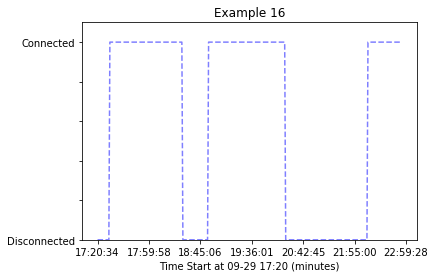

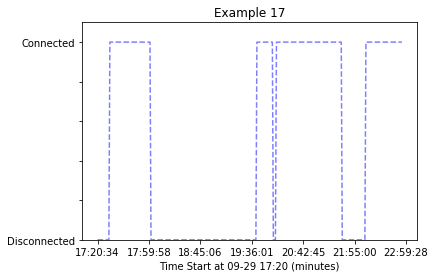

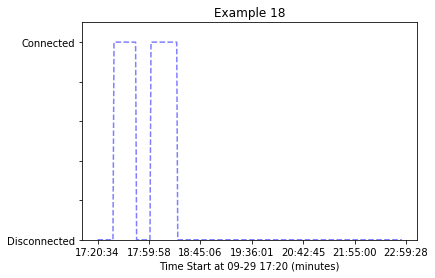

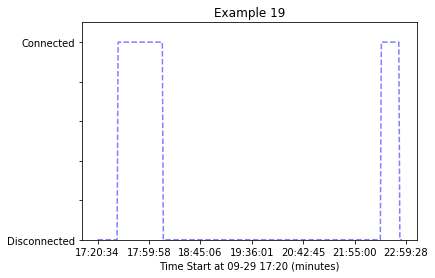

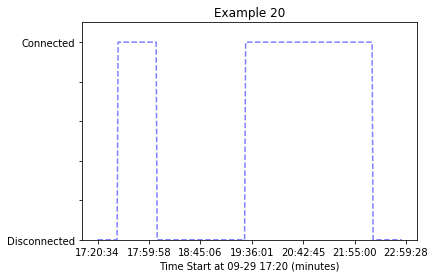

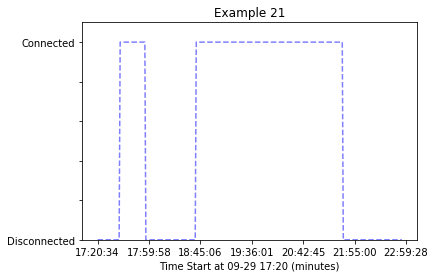

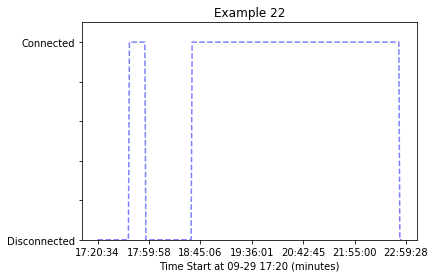

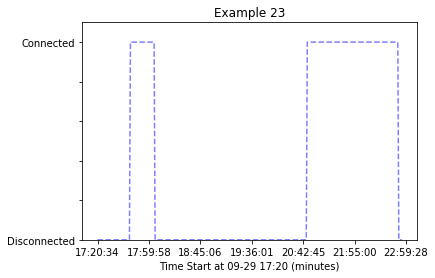

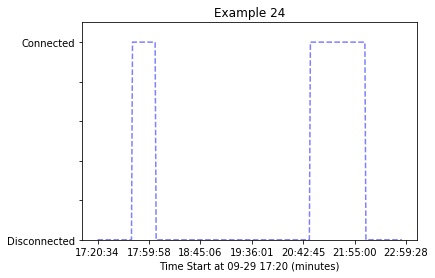

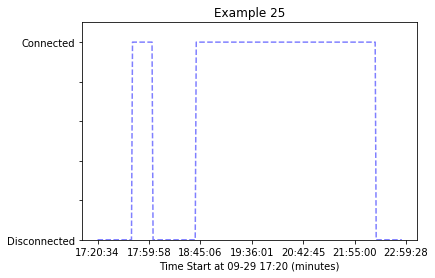

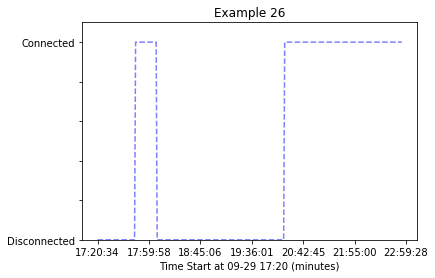

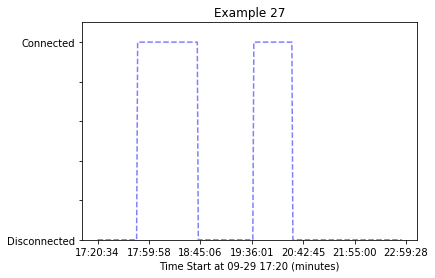

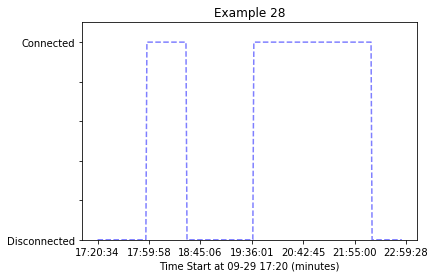

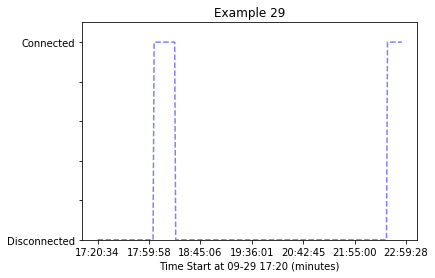

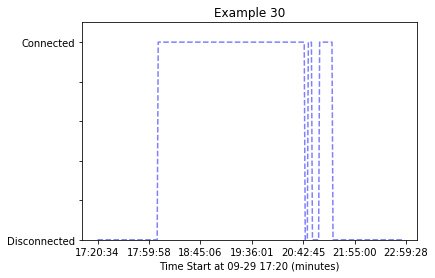

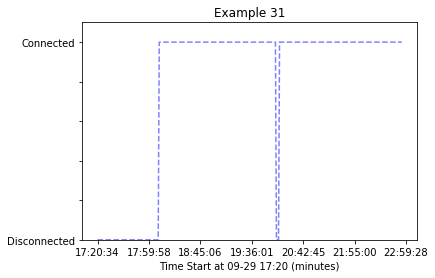

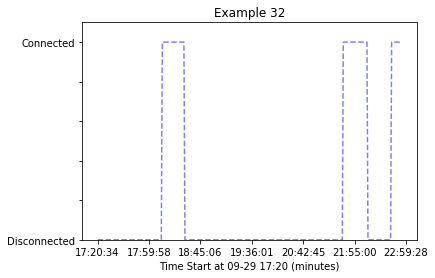

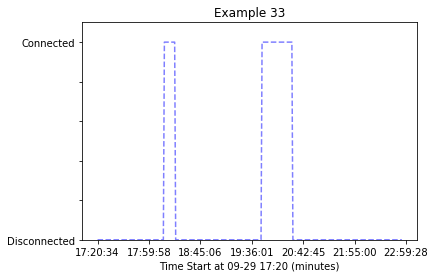

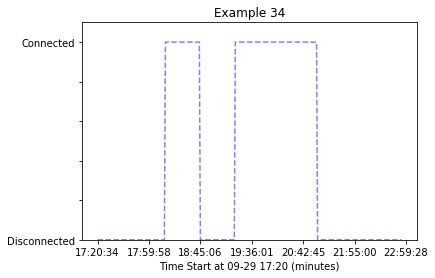

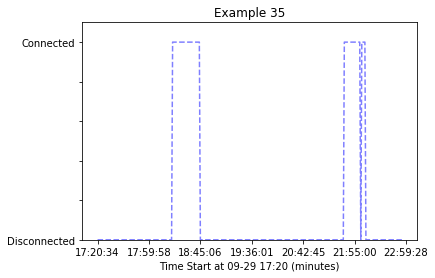

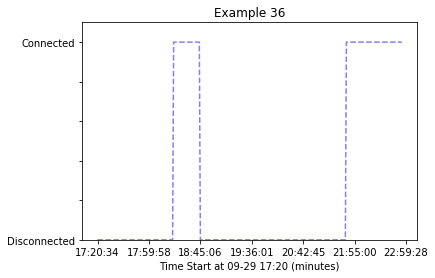

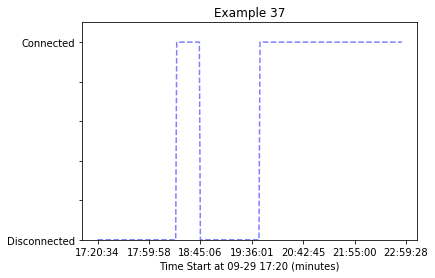

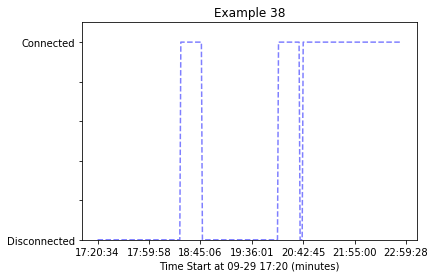

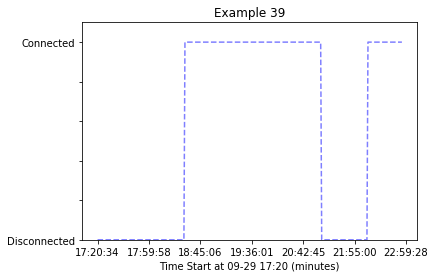

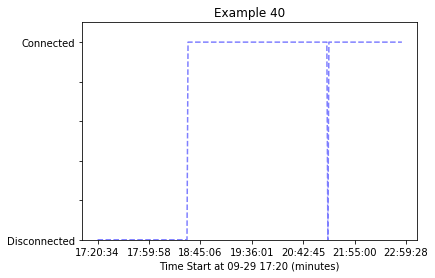

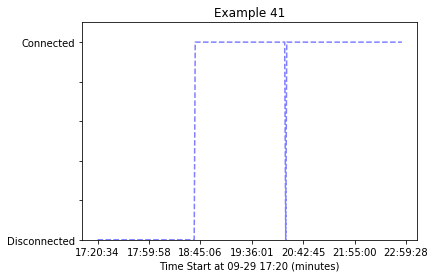

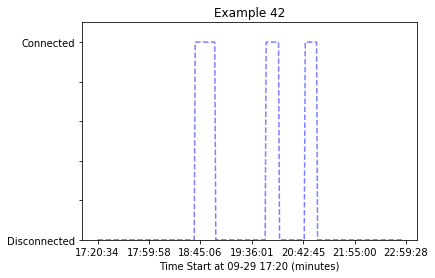

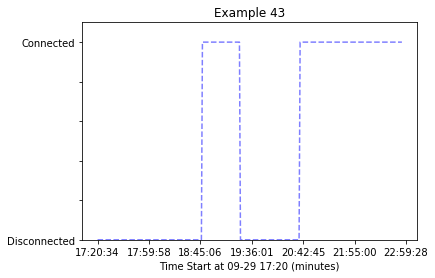

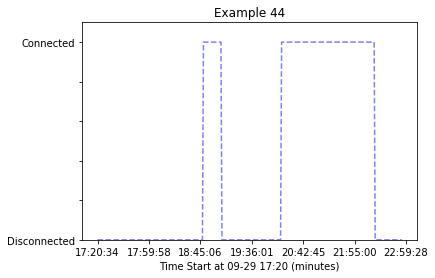

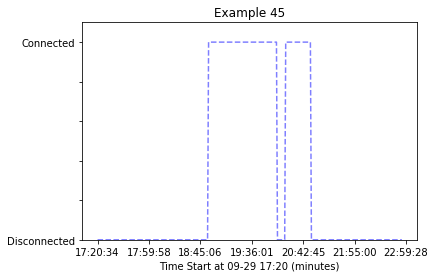

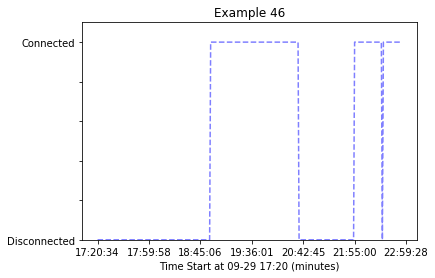

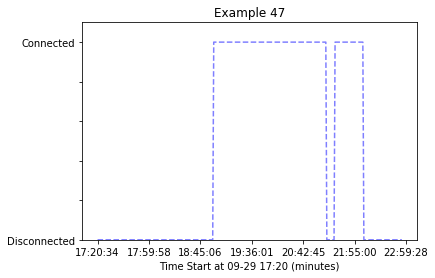

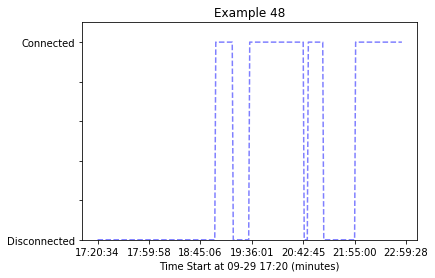

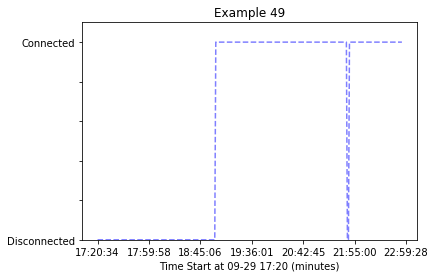

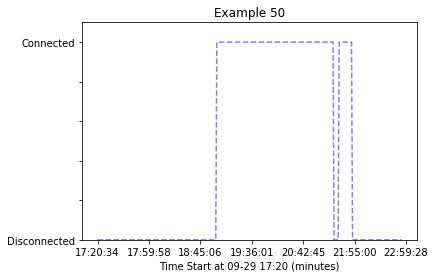

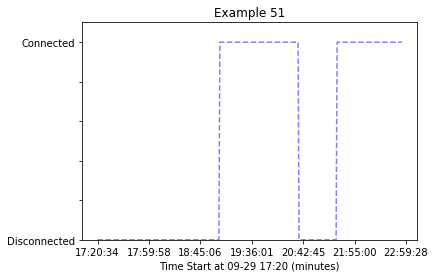

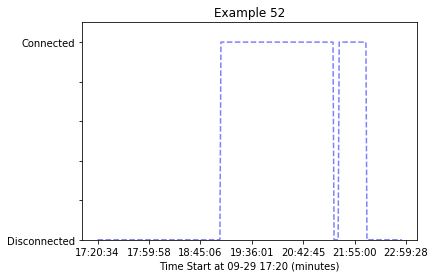

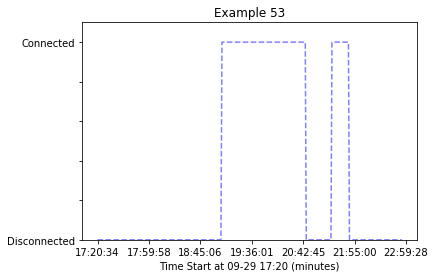

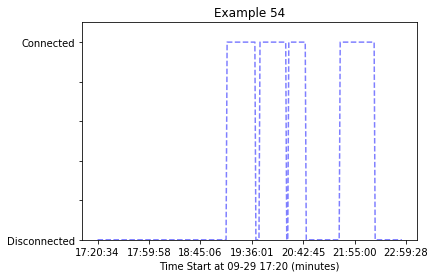

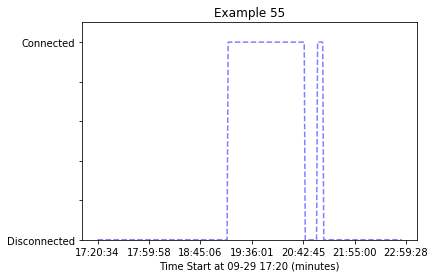

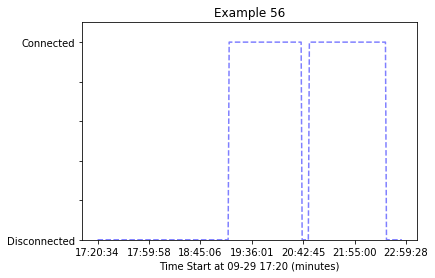

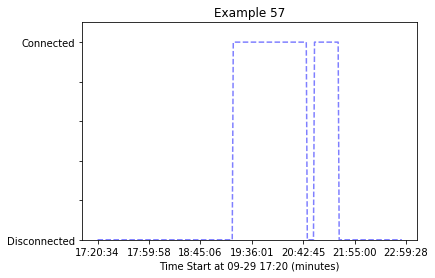

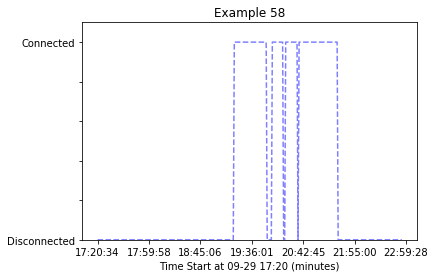

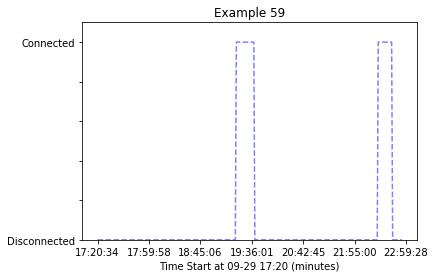

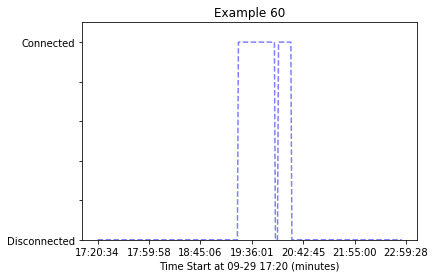

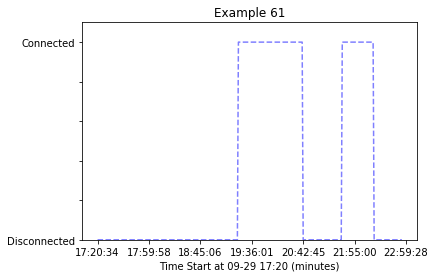

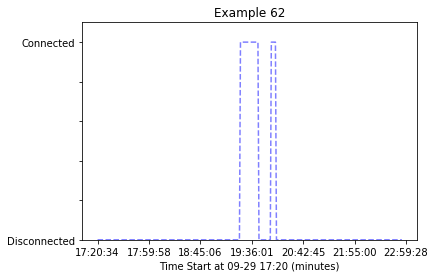

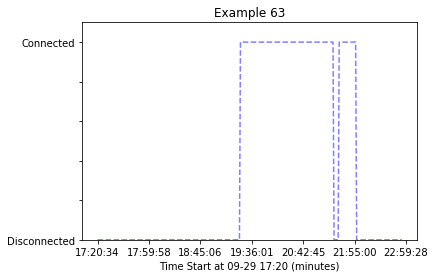

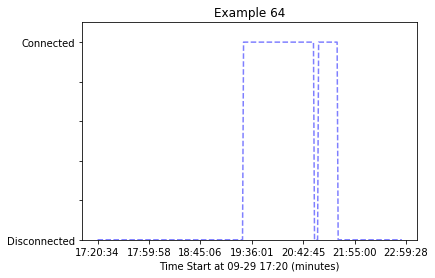

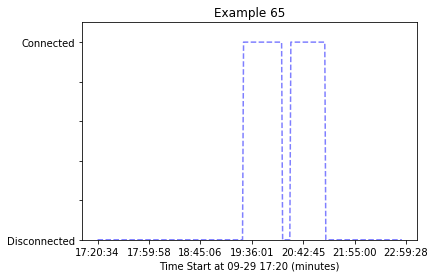

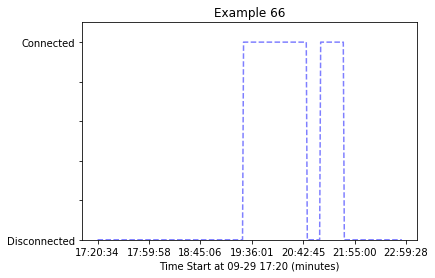

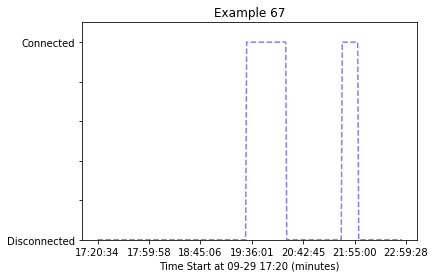

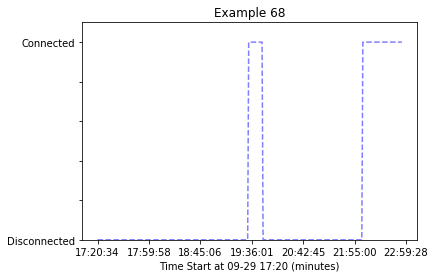

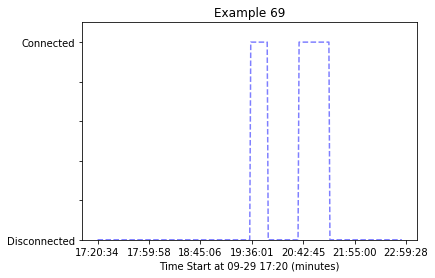

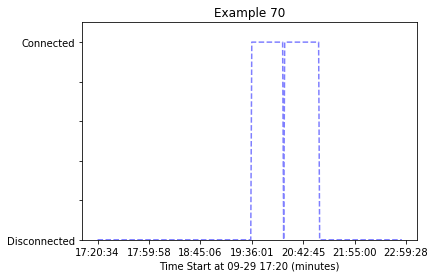

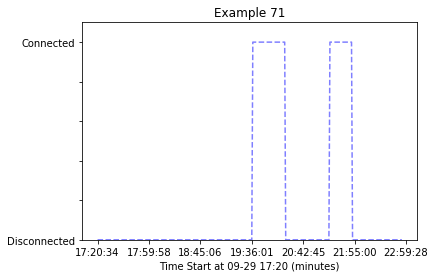

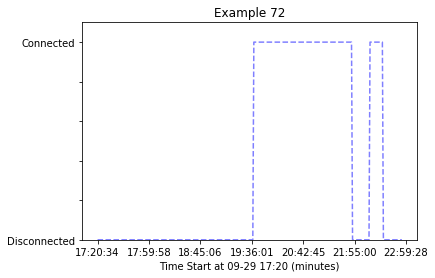

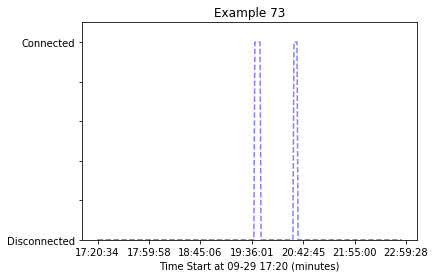

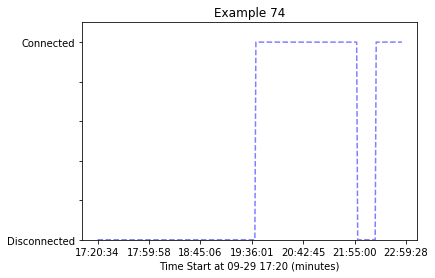

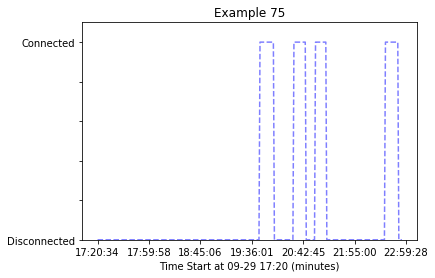

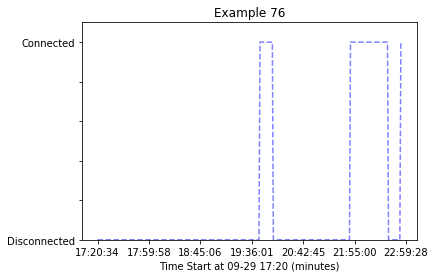

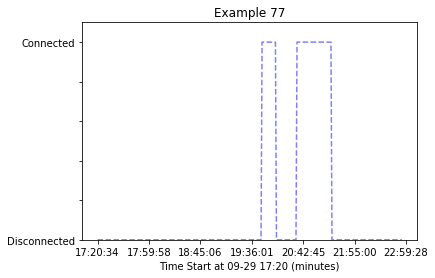

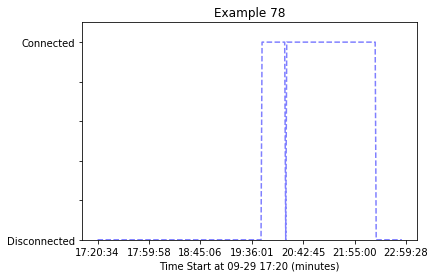

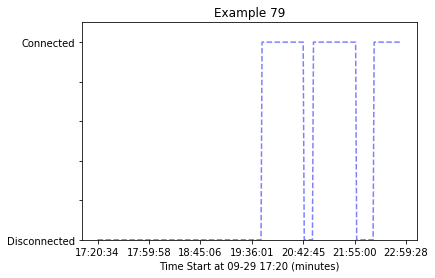

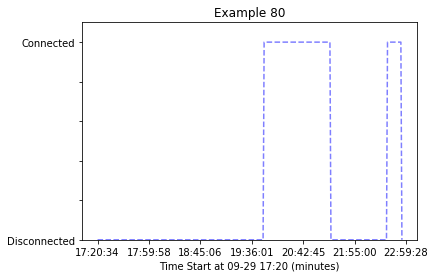

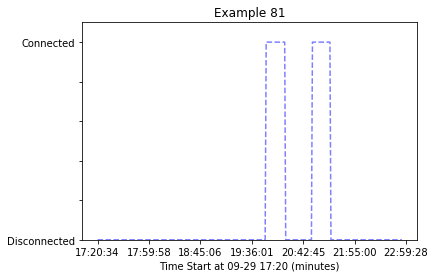

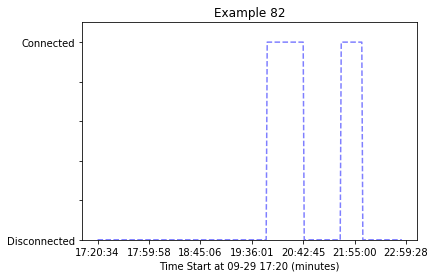

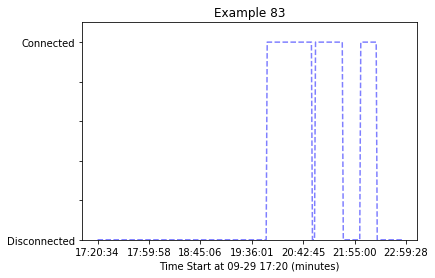

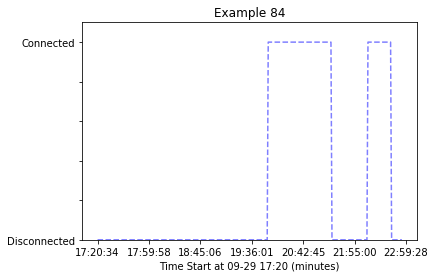

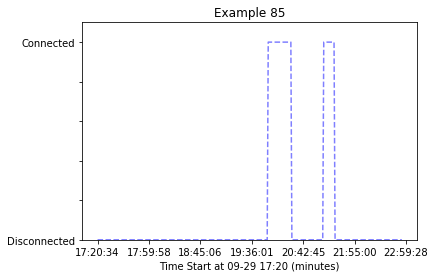

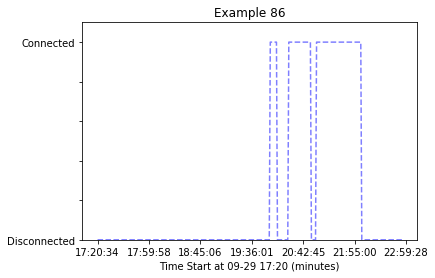

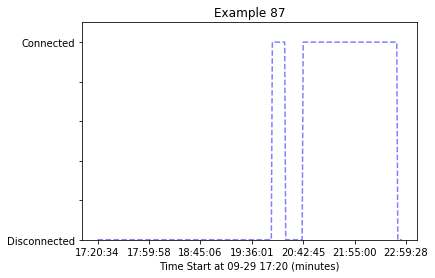

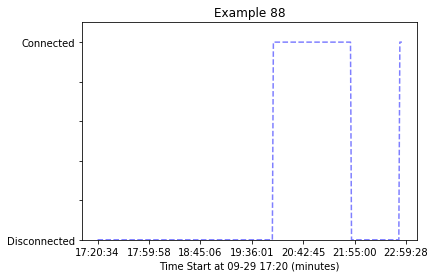

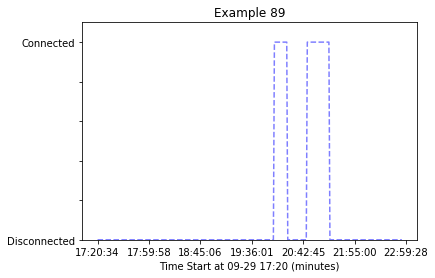

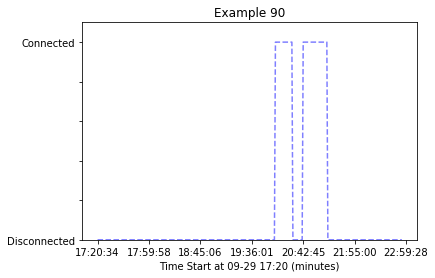

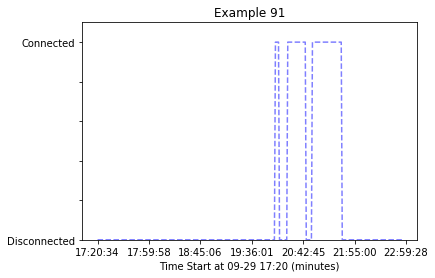

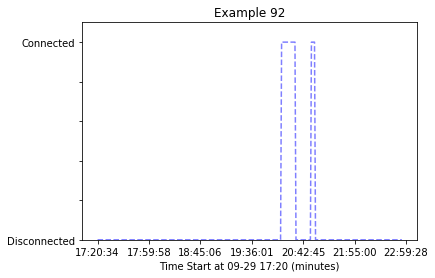

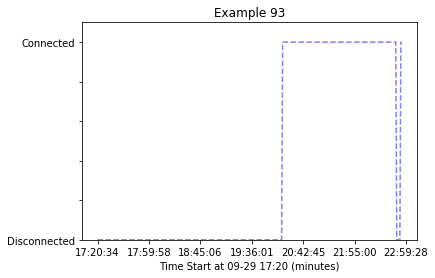

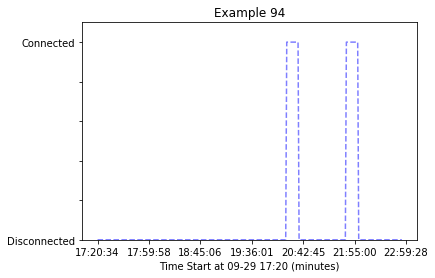

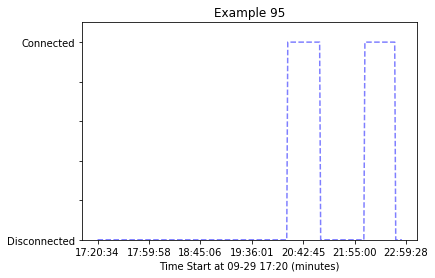

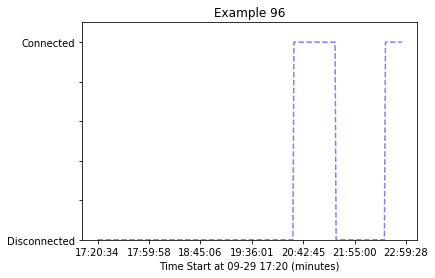

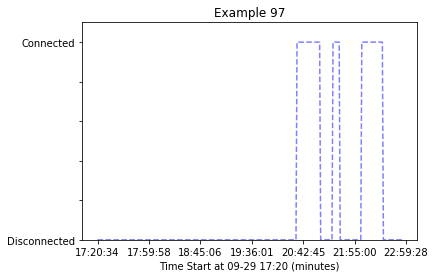

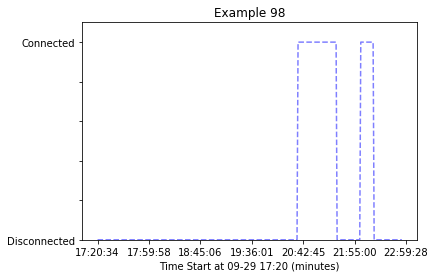

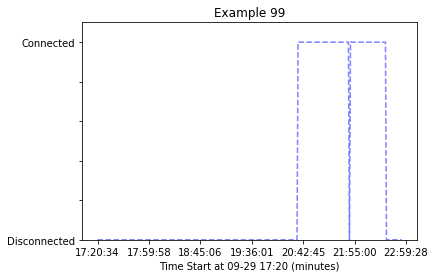

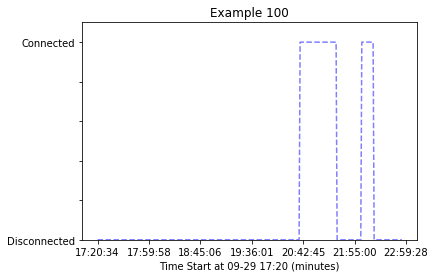

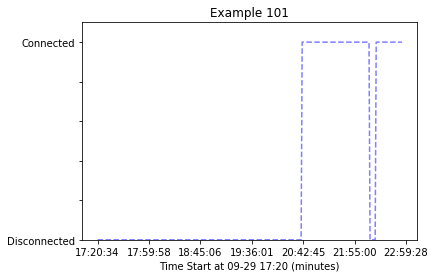

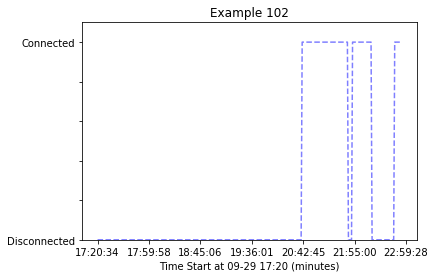

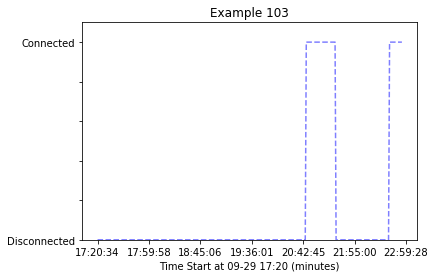

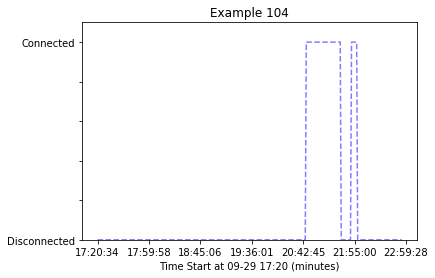

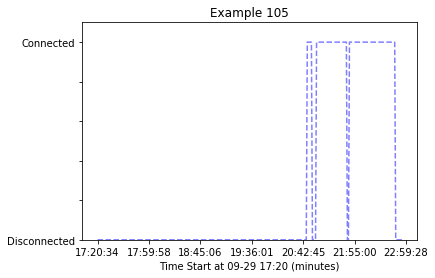

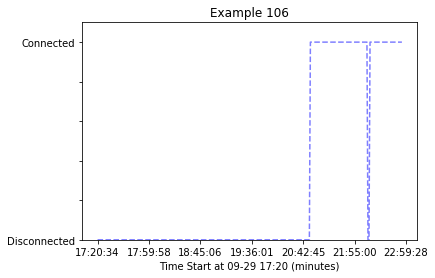

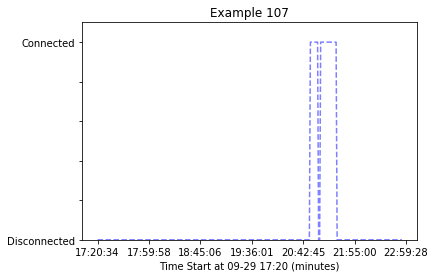

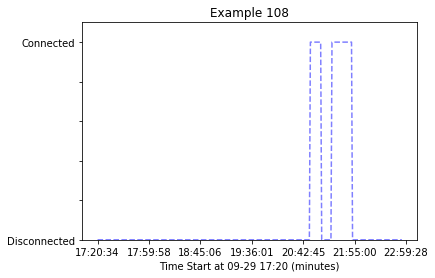

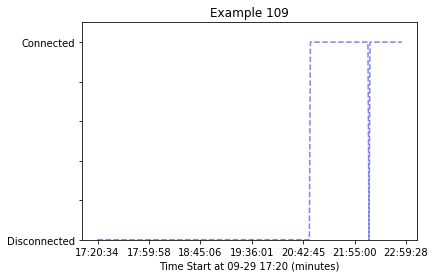

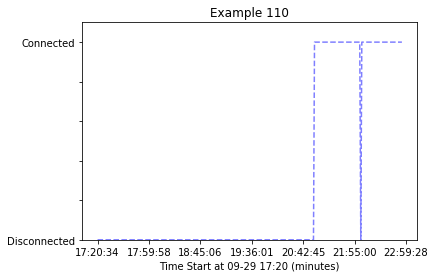

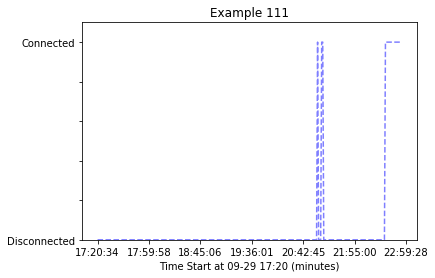

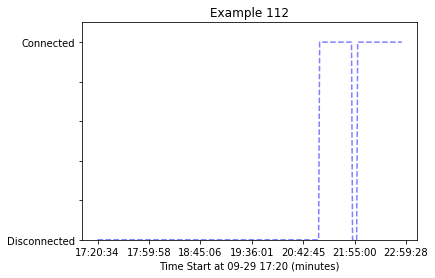

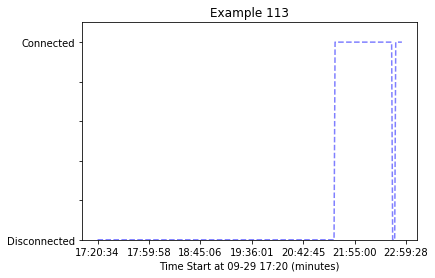

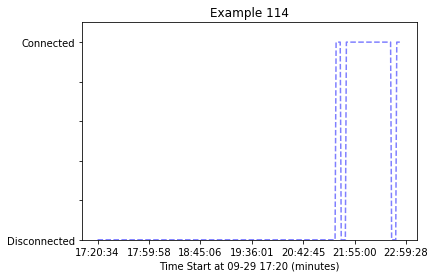

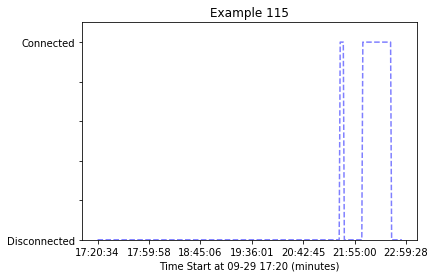

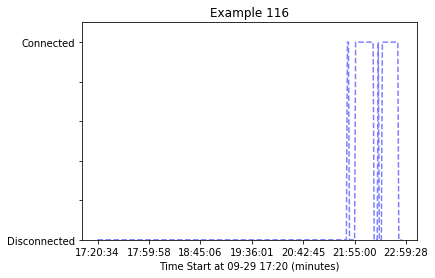

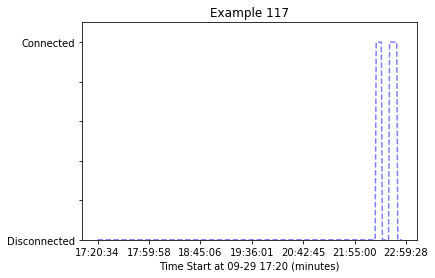

In [65]:
%matplotlib inline
n = np.arange(len(time_list))
for x in range(len(length_2_5)):
    ylabel = get_session(length_2_5[x])
    plt.plot(n,ylabel,'--',color='blue',alpha=0.5)
    plt.yticks([0, 0.2,0.4,0.6,0.8,1.0],['Disconnected','','','','','Connected'],fontsize = 10)
    plt.xticks([0, 50,100,150,200,250,300],[time_list[0],time_list[50],time_list[100],time_list[150],time_list[200],time_list[250],time_list[-1]],fontsize = 10)
    plt.ylim(0,1.1)
    timeStart = '09-29 '+':'.join(time_list[0].split(':')[0:2])
    plt.xlabel('Time Start at %s (minutes)'%timeStart)
    plt.title('Example %d'%x)
    plt.show()

<IPython.core.display.Javascript object>


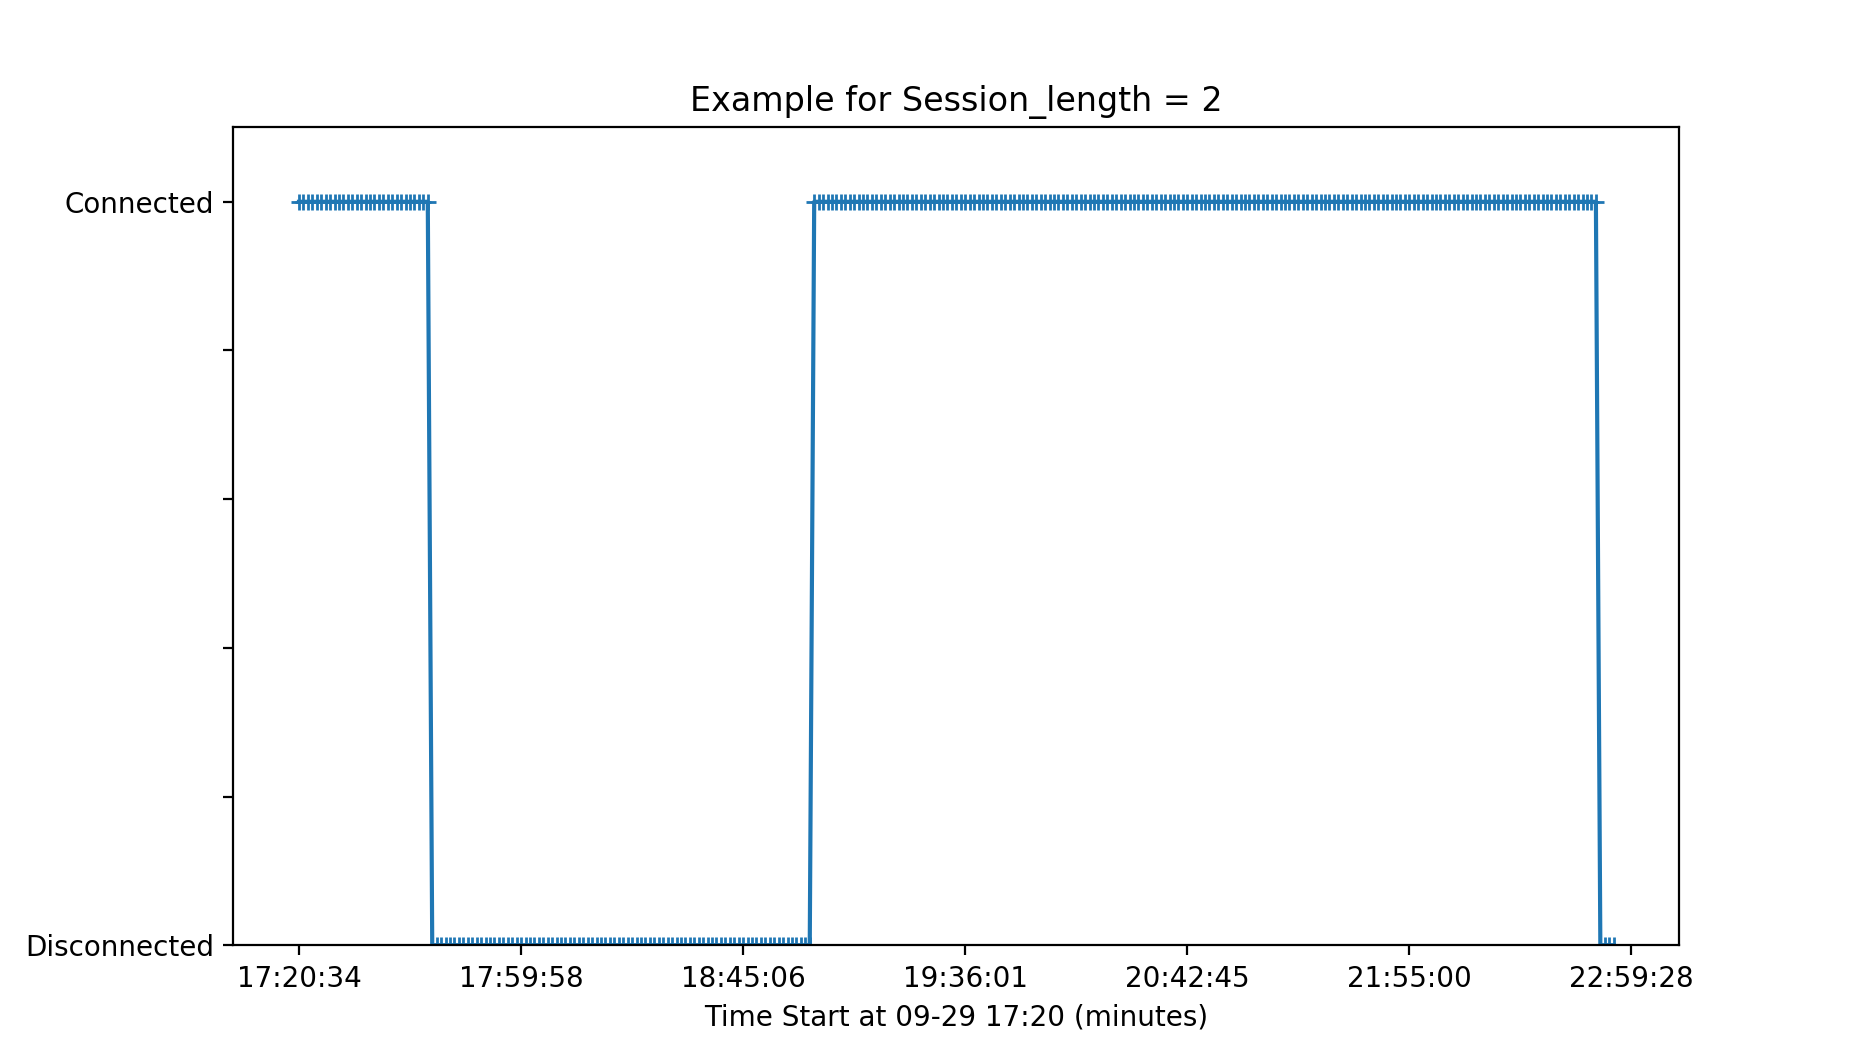

In [21]:
n = np.arange(len(time_list))
plt.plot(n,ylabel1,'-+')
plt.yticks([0, 0.2,0.4,0.6,0.8,1.0],['Disconnected','','','','','Connected'],fontsize = 10)
plt.xticks([0, 50,100,150,200,250,300],[time_list[0],time_list[50],time_list[100],time_list[150],time_list[200],time_list[250],time_list[-1]],fontsize = 10)

plt.ylim(0,1.1)
timeStart = '09-29 '+':'.join(time_list[0].split(':')[0:2])
plt.xlabel('Time Start at %s (minutes)'%timeStart)
plt.title('Example for Session_length = 2')
plt.show()

<IPython.core.display.Javascript object>


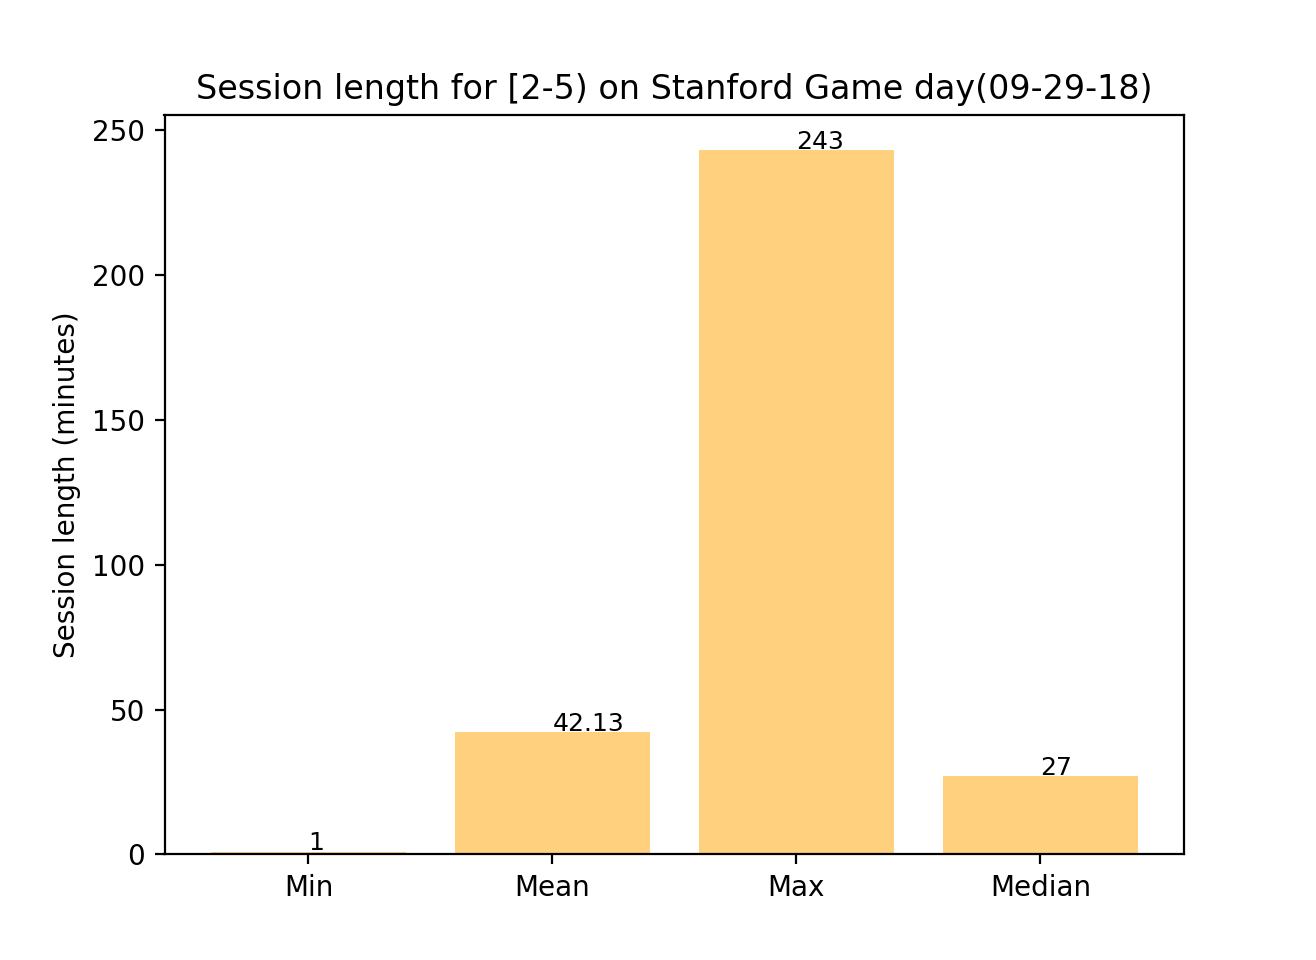

In [23]:
%matplotlib notebook 
objects = ('Min', 'Mean', 'Max', 'Median')
y_pos = np.arange(len(objects))
performance = [min_2_5, mean_2_5,max_2_5,median_2_5]
 
plt.bar(y_pos, performance, align='center',color='Orange', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Session length (minutes)')
plt.title('Session length for [2-5) on Stanford Game day(09-29-18)')
for i in range(len(performance)):
    plt.text(x = y_pos[i] , y = performance[i]+0.5, s = performance[i], size = 9)
# for i, v in enumerate(performance):
#     plt.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.show()

<IPython.core.display.Javascript object>


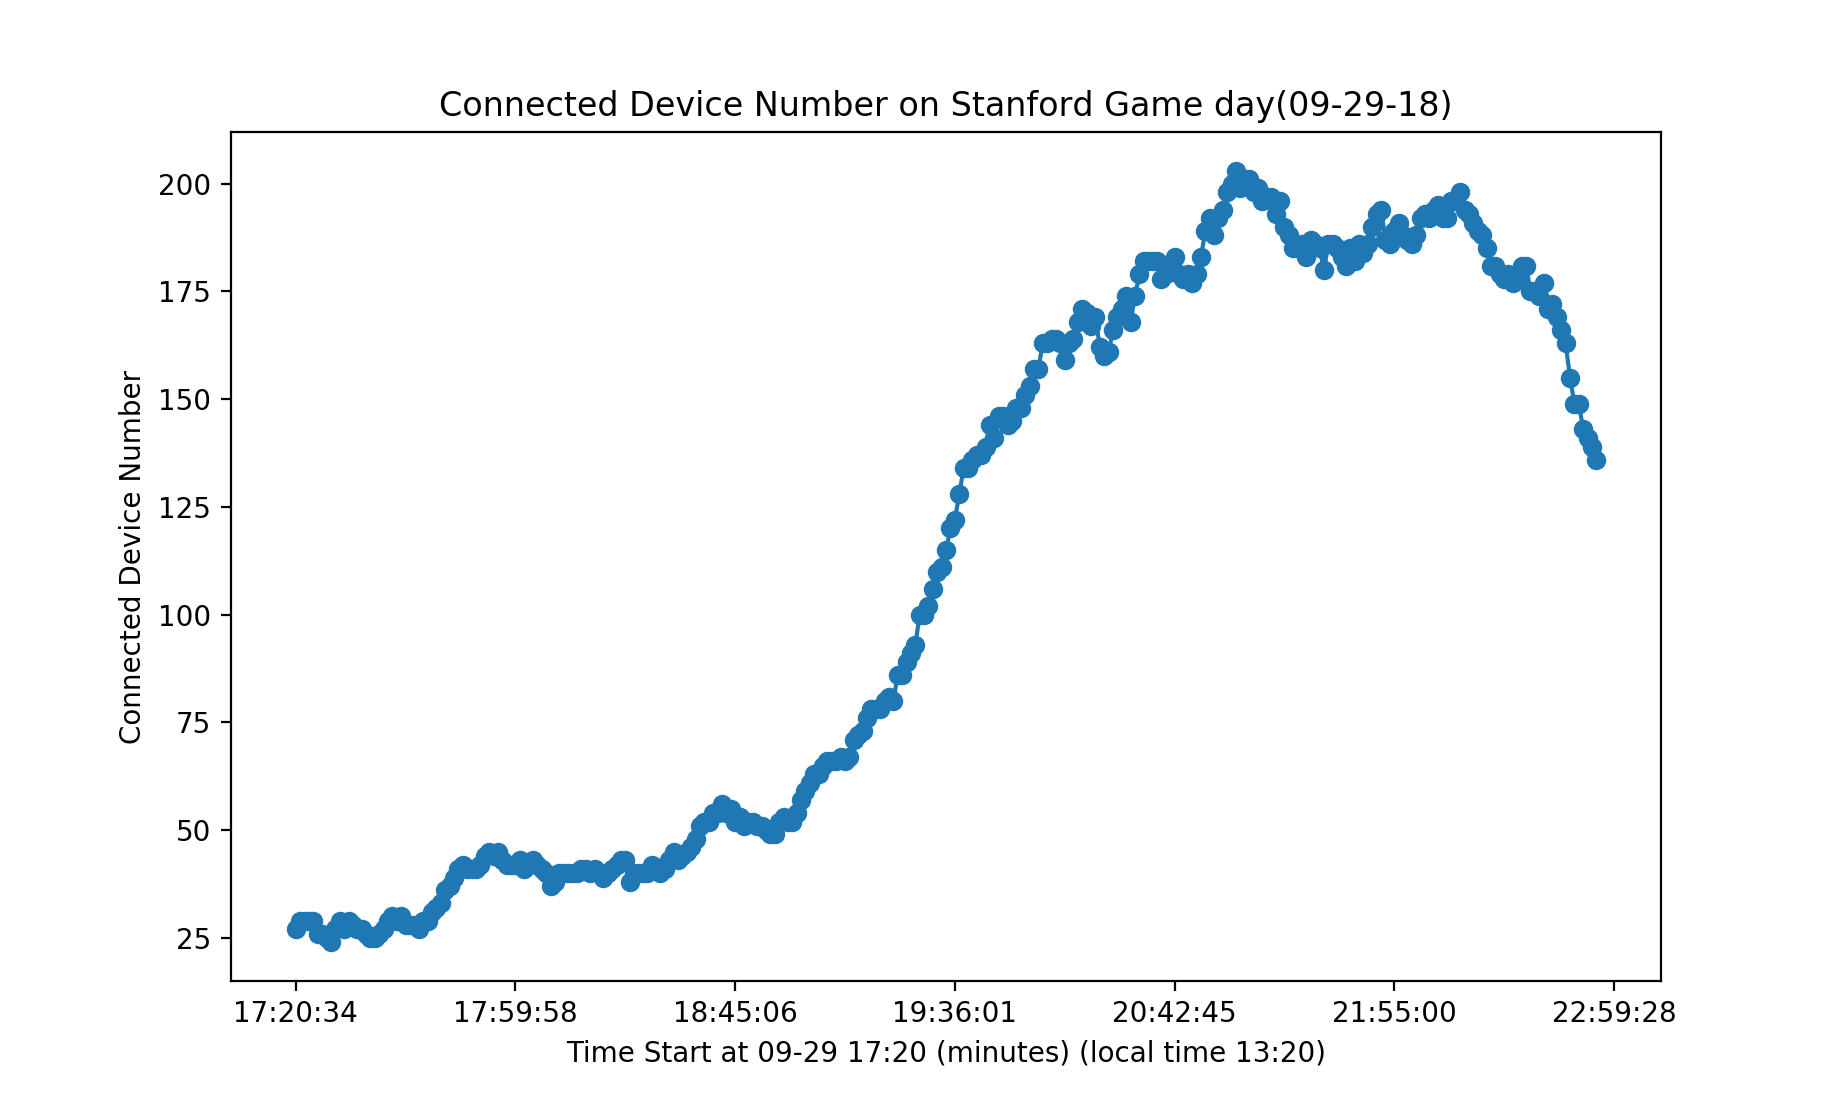

In [47]:
n = np.arange(len(time_list))
plt.plot(n,client_numberlist,'-o')
timeStart = '09-29 '+':'.join(time_list[0].split(':')[0:2])
plt.xticks([0, 50,100,150,200,250,300],[time_list[0],time_list[50],time_list[100],time_list[150],time_list[200],time_list[250],time_list[-1]],fontsize = 10)
plt.xlabel('Time Start at %s (minutes) (local time 13:20)'%timeStart)
plt.ylabel('Connected Device Number')
plt.title('Connected Device Number on Stanford Game day(09-29-18)')
plt.show()

In [66]:
a = get_sec(time_list[-1]) - get_sec(time_list[266])
b = a/60
b

41.166666666666664

In [43]:
gx_0 = []
gx_30 = []
gx_60 = []
gx_over_60 = []
for x in stay_interval:
    if 296 - x[-1][-1]<=0:
        gx_0.append(0)
    if 296 - x[-1][-1] > 0 and 296 - x[-1][-1] <=30:
        gx_30.append(296 - x[-1][-1])
    elif 296 - x[-1][-1] > 30 and 296 - x[-1][-1] <=60:
        gx_60.append(296 - x[-1][-1])
    elif 296 - x[-1][-1] > 60:
        gx_over_60.append(296 - x[-1][-1])
#     print(time_list[x[-1][-1]])


<IPython.core.display.Javascript object>


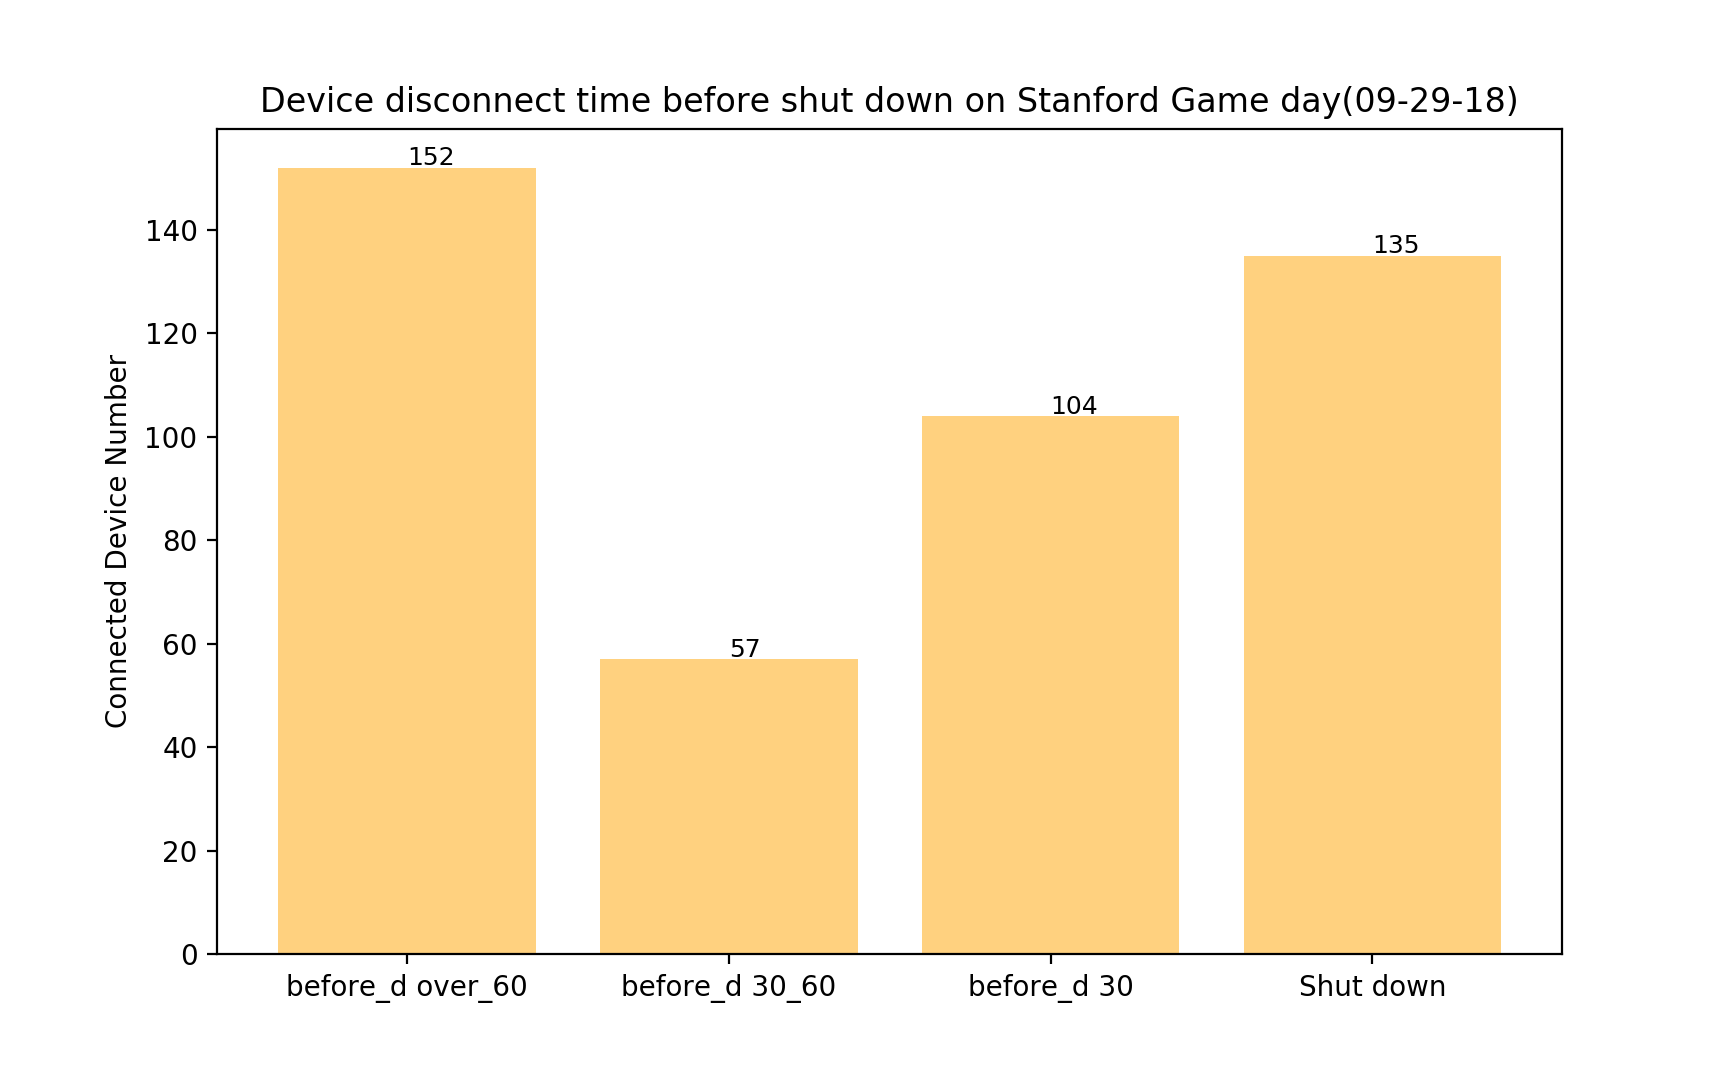

In [45]:
objects = ('before_d over_60', 'before_d 30_60', 'before_d 30', 'Shut down')
y_pos = np.arange(len(objects))
performance = [len(gx_over_60), len(gx_60),len(gx_30),len(gx_0)]
 
plt.bar(y_pos, performance, align='center',color='Orange', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Connected Device Number')
plt.title('Device disconnect time before shut down on Stanford Game day(09-29-18)')
for i in range(len(performance)):
    plt.text(x = y_pos[i] , y = performance[i]+0.5, s = performance[i], size = 9)
plt.show()

In [ ]:
def get_leave_time(inputlist):
    cut_point = []
    qconn = [get_sec(x) for x in inputlist]
    for x in range(1,len(qconn)):
        if qconn[x-1]-qconn[x]>=600:
            cut_point.append(x-1)
    return cut_point